Dataset:
    outlook temperature humidity  windy play
0     sunny         hot     high  false   no
1     sunny         hot     high   true   no
2  overcast         hot     high  false  yes
3     rainy        mild     high  false  yes
4     rainy        cool   normal  false  yes

Encoded Features:
   outlook  temperature  humidity  windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1      0

Accuracy: 0.6

Confusion Matrix:
 [[1 1]
 [1 2]]


/tmp/ipython-input-2417873253.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-2417873253.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-2417873253.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

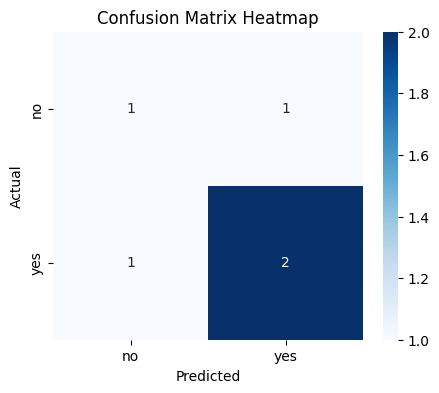

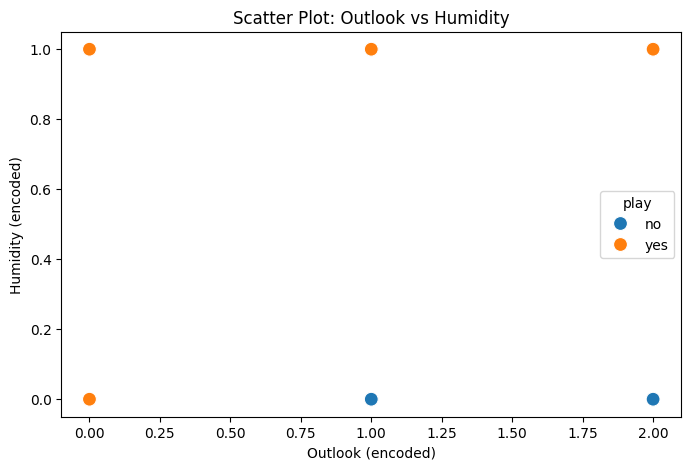

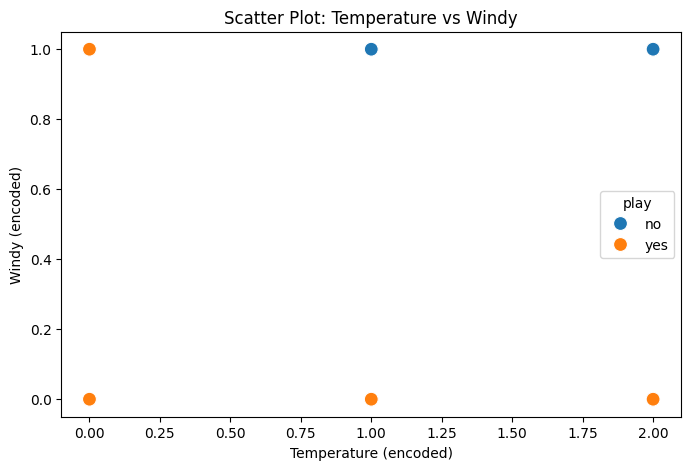

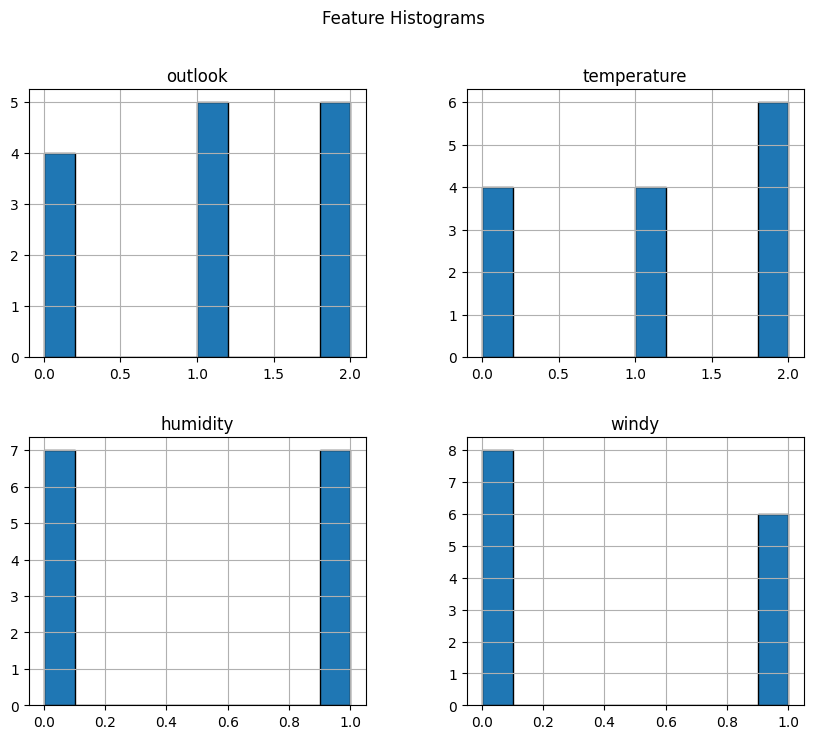

In [1]:
# 1. Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# 2. Create the dataset (Weather – Play Tennis)
data = {
    "outlook": [
        "sunny","sunny","overcast","rainy","rainy","rainy",
        "overcast","sunny","sunny","rainy","sunny","overcast",
        "overcast","rainy"
    ],
    "temperature": [
        "hot","hot","hot","mild","cool","cool",
        "cool","mild","cool","mild","mild","mild",
        "hot","mild"
    ],
    "humidity": [
        "high","high","high","high","normal","normal",
        "normal","high","normal","normal","normal","high",
        "normal","high"
    ],
    "windy": [
        "false","true","false","false","false","true",
        "true","false","false","false","true","true",
        "false","true"
    ],
    "play": [
        "no","no","yes","yes","yes","no",
        "yes","no","yes","yes","yes","yes",
        "yes","no"
    ]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df.head())


# 3. Encode categorical variables
X = df[["outlook", "temperature", "humidity", "windy"]]
y = df["play"]

encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

print("\nEncoded Features:")
print(X.head())


# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# 5. Train Naive Bayes Model
model = CategoricalNB()
model.fit(X_train, y_train)


# 6. Predictions
y_pred = model.predict(X_test)


# 7. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


# 9. Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=le_y.classes_,
    yticklabels=le_y.classes_
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 10. Scatter Plot Visualisations
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X["outlook"],
    y=X["humidity"],
    hue=y,
    s=100
)
plt.title("Scatter Plot: Outlook vs Humidity")
plt.xlabel("Outlook (encoded)")
plt.ylabel("Humidity (encoded)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X["temperature"],
    y=X["windy"],
    hue=y,
    s=100
)
plt.title("Scatter Plot: Temperature vs Windy")
plt.xlabel("Temperature (encoded)")
plt.ylabel("Windy (encoded)")
plt.show()


# 11. Feature Histograms
X.hist(figsize=(10,8), edgecolor="black")
plt.suptitle("Feature Histograms")
plt.show()
